In [564]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

# TRAIN

In [565]:
for i in range(45):
    if i==0:
        train = pd.read_csv('salida/resultados/SICK/presentacion/TRAIN_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/SICK/presentacion/TRAIN_'+str(i+1)+'.csv.csv')
        train=pd.concat([train,temp])

In [566]:
temp1 = pd.read_csv("data/SICK/original/SICK_TRAIN.csv")
temp1

,sentence_A,sentence_B,entailment_label
0,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,NEUTRAL
1,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,NEUTRAL
2,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,ENTAILMENT
3,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,NEUTRAL
4,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,NEUTRAL
...,...,...,...
4434,A door is being opened by a man,A bald man in a band is playing guitar in the ...,NEUTRAL
4435,Someone is boiling okra in a pot,The man is not playing the drums,NEUTRAL
4436,The man is singing heartily and playing the gu...,A bicyclist is holding a bike over his head in...,NEUTRAL
4437,A man in blue has a yellow ball in the mitt,A man is jumping rope outside,NEUTRAL


In [567]:
#train["relaciones"]=train["relaciones"]+train["antonimos"]

<Axes: title={'center': 'suma'}, xlabel='CLASS'>

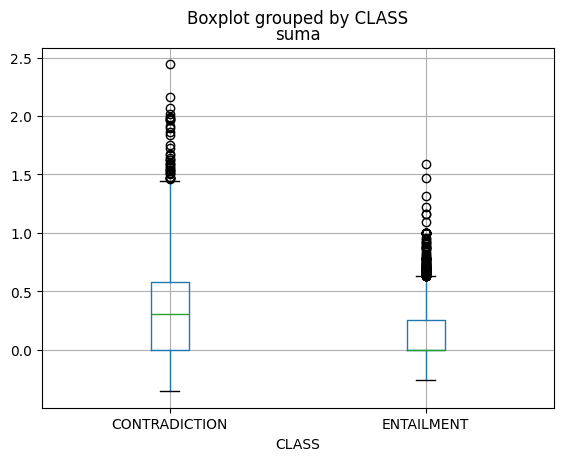

In [568]:
train.boxplot(by="CLASS",column=["suma"])

<Axes: title={'center': 'suma'}, xlabel='CLASS'>

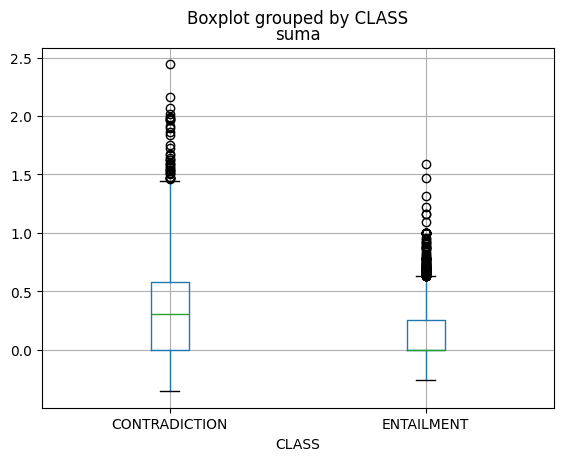

In [569]:
train.boxplot(by="CLASS",column=["suma"])

In [570]:
# train["bandera"]=-1
# temp=train.copy()
# for index, strings  in temp.iterrows():
#     if strings["m_earth"]==0.0:
#         train.at[index,"bandera"]=1

In [571]:
#train=train.drop(["antonimos","sim_faltantes","distancias","suma"],axis=1)
train=train.reset_index(drop=True)
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.256181,133.77597,1.000,0.685520,0.332179,0.710647,0,0,0.544880,CONTRADICTION
1,0.405954,715.74304,2.197,2.104376,1.626334,1.220333,1,2,0.422324,CONTRADICTION
2,0.079613,170.33334,1.585,0.682195,0.231839,0.710647,0,0,0.575199,ENTAILMENT
3,0.087863,704.00780,2.171,3.503575,2.801286,0.976367,0,0,0.177042,CONTRADICTION
4,0.319429,1958.64950,2.581,4.141778,3.274561,2.641717,1,1,0.646140,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...
4434,0.246888,741.48150,1.685,3.526506,2.440007,0.678063,0,0,0.177094,CONTRADICTION
4435,0.110792,620.13116,1.530,2.093066,1.058870,0.677722,0,0,0.215289,CONTRADICTION
4436,0.245541,2406.39450,2.209,4.867770,3.191463,2.083873,1,1,0.554890,CONTRADICTION
4437,-0.022775,543.06150,2.156,1.432420,1.186878,0.802427,0,0,0.369778,CONTRADICTION


In [572]:
train["CLASS"]=temp1["entailment_label"]
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.256181,133.77597,1.000,0.685520,0.332179,0.710647,0,0,0.544880,NEUTRAL
1,0.405954,715.74304,2.197,2.104376,1.626334,1.220333,1,2,0.422324,NEUTRAL
2,0.079613,170.33334,1.585,0.682195,0.231839,0.710647,0,0,0.575199,ENTAILMENT
3,0.087863,704.00780,2.171,3.503575,2.801286,0.976367,0,0,0.177042,NEUTRAL
4,0.319429,1958.64950,2.581,4.141778,3.274561,2.641717,1,1,0.646140,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...
4434,0.246888,741.48150,1.685,3.526506,2.440007,0.678063,0,0,0.177094,NEUTRAL
4435,0.110792,620.13116,1.530,2.093066,1.058870,0.677722,0,0,0.215289,NEUTRAL
4436,0.245541,2406.39450,2.209,4.867770,3.191463,2.083873,1,1,0.554890,NEUTRAL
4437,-0.022775,543.06150,2.156,1.432420,1.186878,0.802427,0,0,0.369778,NEUTRAL


In [573]:
train[train["m_earth"]==0.0]

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
11,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,ENTAILMENT
14,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,CONTRADICTION
23,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,NEUTRAL
35,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,ENTAILMENT
44,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,ENTAILMENT
...,...,...,...,...,...,...,...,...,...,...
4305,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,NEUTRAL
4321,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,CONTRADICTION
4324,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,NEUTRAL
4327,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,CONTRADICTION


In [574]:
X = np.array(train.drop(['CLASS'],axis=1))
y_ = np.array(train['CLASS'])

In [575]:
y_train=y_

In [576]:
# # SICK
# y_train=[]
# for i in y_:
#     if i == "ENTAILMENT":
#         y_train.append(1)
#     elif i == "NEUTRAL":
#         y_train.append(2)
#     else:
#         y_train.append(0)

In [577]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

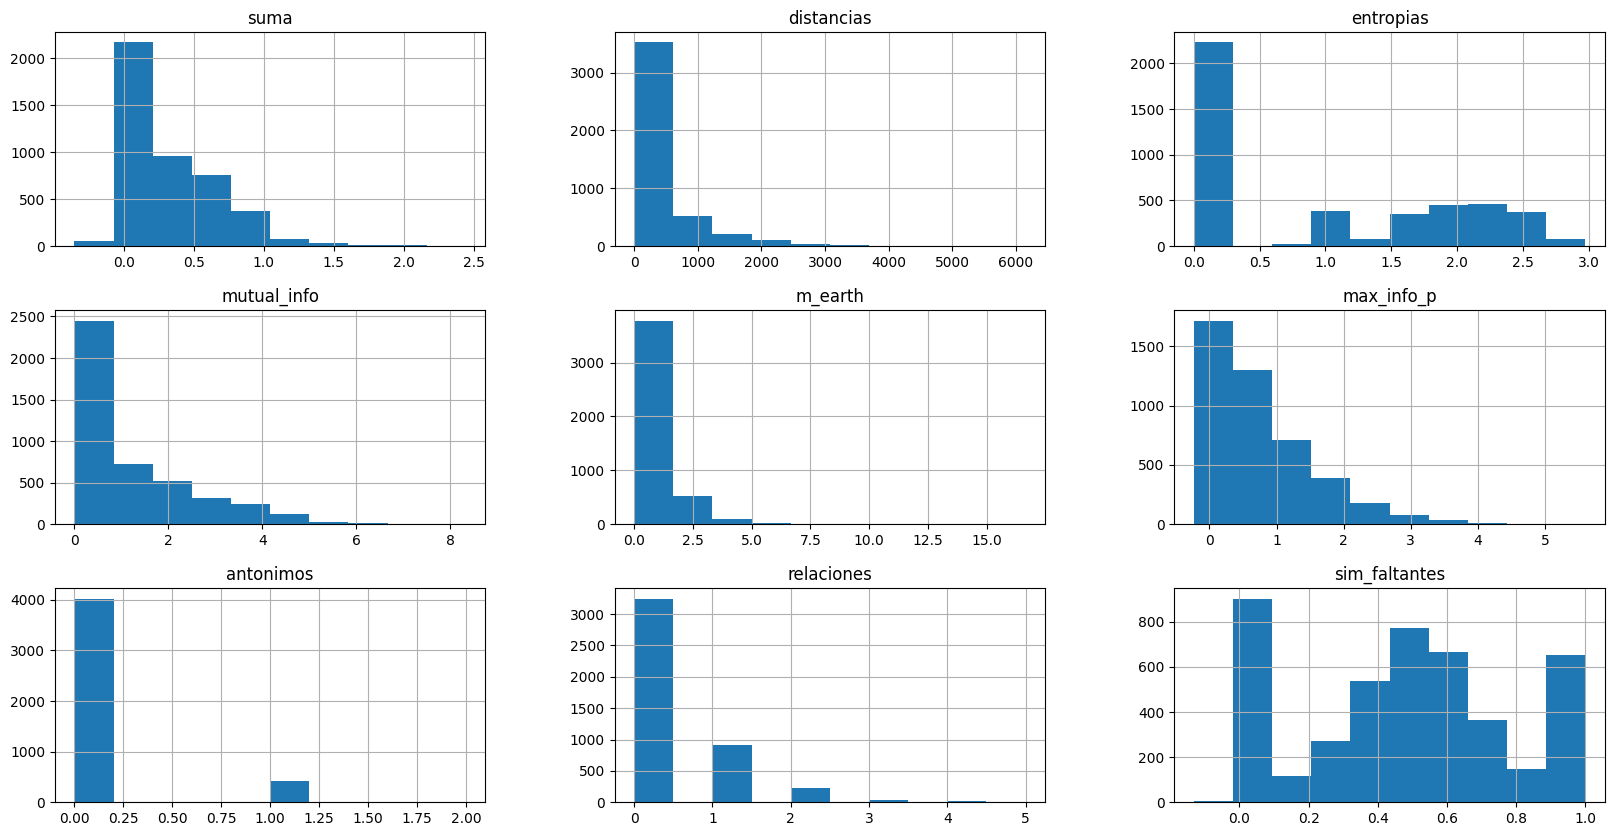

In [578]:
train.hist(figsize=(20,10))
plt.show()

# DEV

In [579]:
for i in range(5):
    if i==0:
        dev = pd.read_csv('salida/resultados/SICK/presentacion/DEV_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/SICK/presentacion/DEV_'+str(i+1)+'.csv.csv')
        dev=pd.concat([dev,temp])

In [580]:
#dev["relaciones"]=dev["relaciones"]+dev["antonimos"]

In [581]:
# dev["bandera"]=-1
# temp=dev.copy()
# for index, strings  in temp.iterrows():
#     if strings["m_earth"]==0.0:
#         dev.at[index,"bandera"]=1

In [582]:
#dev=dev.drop(["antonimos","sim_faltantes","distancias","suma"],axis=1)
dev

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.517381,239.79778,0.000,1.368566,0.912076,0.557043,0,0,0.352328,CONTRADICTION
1,0.653972,1350.34460,2.338,3.471361,1.687463,2.614866,0,1,0.660948,CONTRADICTION
2,0.604197,132.28865,1.000,1.420585,0.534727,0.604197,0,0,0.362501,CONTRADICTION
3,1.077954,1020.32196,2.390,3.528014,2.892120,2.360747,0,1,0.611783,CONTRADICTION
4,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...
90,0.477556,828.22920,1.784,2.059726,1.580747,1.163645,0,1,0.588903,CONTRADICTION
91,-0.102327,133.99570,1.000,0.670035,0.282470,0.404658,0,0,0.260126,CONTRADICTION
92,0.263025,785.95840,2.459,2.791256,1.364256,0.791051,0,0,0.246701,CONTRADICTION
93,0.095059,1160.19250,2.352,2.763037,2.291368,1.437532,0,1,0.320581,CONTRADICTION


In [583]:
temp1 = pd.read_csv("data/SICK/original/SICK_DEV.csv")
temp1

,sentence_A,sentence_B,entailment_label
0,The young boys are playing outdoors and the ma...,There is no boy playing outdoors and there is ...,CONTRADICTION
1,A person in a black jacket is doing tricks on ...,A skilled person is riding a bicycle on one wheel,NEUTRAL
2,Four children are doing backbends in the gym,Four girls are doing backbends and playing out...,NEUTRAL
3,A player is throwing the ball,Two teams are competing in a football match,NEUTRAL
4,Five children are standing in front of a woode...,Five children are standing in a wooden hut,NEUTRAL
...,...,...,...
490,A biker is riding away from a fence,A man is dancing on the road,NEUTRAL
491,A woman is playing an electric guitar,A kid is playing guitar,NEUTRAL
492,The animal is grazing on the grass,The cop is sitting on a police bike,NEUTRAL
493,The dog is snapping at some droplets of water,A girl in a band is playing an instrument,NEUTRAL


In [584]:
dev["CLASS"]=temp1["entailment_label"]
dev

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.517381,239.79778,0.000,1.368566,0.912076,0.557043,0,0,0.352328,CONTRADICTION
1,0.653972,1350.34460,2.338,3.471361,1.687463,2.614866,0,1,0.660948,NEUTRAL
2,0.604197,132.28865,1.000,1.420585,0.534727,0.604197,0,0,0.362501,NEUTRAL
3,1.077954,1020.32196,2.390,3.528014,2.892120,2.360747,0,1,0.611783,NEUTRAL
4,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...
90,0.477556,828.22920,1.784,2.059726,1.580747,1.163645,0,1,0.588903,ENTAILMENT
91,-0.102327,133.99570,1.000,0.670035,0.282470,0.404658,0,0,0.260126,ENTAILMENT
92,0.263025,785.95840,2.459,2.791256,1.364256,0.791051,0,0,0.246701,ENTAILMENT
93,0.095059,1160.19250,2.352,2.763037,2.291368,1.437532,0,1,0.320581,NEUTRAL


In [585]:
X_dev = np.array(dev.drop(['CLASS'],axis=1))
y_d = np.array(dev['CLASS'])

In [586]:
y_dev=y_d

In [587]:
# # SICK
# y_dev=[]
# for i in y_d:
#     if i == "ENTAILMENT":
#         y_dev.append(1)
#     elif i == "NEUTRAL":
#         y_dev.append(2)
#     else:
#         y_dev.append(0)

In [588]:
scaler = preprocessing.StandardScaler().fit(X_dev)
X_scaled = scaler.transform(X_dev)
X_dev = X_scaled

# TEST

In [589]:
for i in range(50):
    if i==0:
        test = pd.read_csv('salida/resultados/SICK/presentacion/TEST_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/SICK/presentacion/TEST_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [590]:
#test["relaciones"]=test["relaciones"]+test["antonimos"]

In [591]:
# test["bandera"]=-1
# temp=test.copy()
# for index, strings  in temp.iterrows():
#     if strings["m_earth"]==0.0:
#         test.at[index,"bandera"]=1

In [592]:
#test=test.drop(["antonimos","sim_faltantes","distancias","suma"],axis=1)
test

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.305934,2043.258800,2.514,4.140434,3.473197,2.260727,0,0,0.562271,CONTRADICTION
1,0.182975,942.280940,2.524,2.774364,2.741071,1.473877,0,0,0.487296,CONTRADICTION
2,0.683885,1628.242900,2.453,3.496069,2.353635,2.456701,0,1,0.650113,CONTRADICTION
3,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,ENTAILMENT
4,0.473630,45.112247,0.000,0.669430,0.262647,0.473630,0,0,0.473630,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...
1,0.447379,1145.020000,2.671,2.781929,1.478042,1.756696,0,1,0.533970,CONTRADICTION
2,0.050541,1538.683100,2.041,2.765430,3.072888,1.246748,0,1,0.335198,CONTRADICTION
3,-0.155236,766.717400,2.189,2.792837,2.510770,0.930635,0,1,0.156710,CONTRADICTION
4,0.341457,4568.515600,2.383,5.572761,4.585931,3.162525,0,2,0.589734,CONTRADICTION


In [593]:
test[test["m_earth"]==0.0]

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
3,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,ENTAILMENT
9,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,ENTAILMENT
10,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,CONTRADICTION
11,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,CONTRADICTION
12,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,ENTAILMENT
...,...,...,...,...,...,...,...,...,...,...
63,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,ENTAILMENT
64,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,CONTRADICTION
65,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,ENTAILMENT
70,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,ENTAILMENT


In [594]:
temp1 = pd.read_csv("data/SICK/original/SICK_TEST.csv")
temp1

,sentence_A,sentence_B,entailment_label
0,There is no boy playing outdoors and there is ...,A group of kids is playing in a yard and an ol...,NEUTRAL
1,A group of boys in a yard is playing and a man...,The young boys are playing outdoors and the ma...,NEUTRAL
2,A group of children is playing in the house an...,The young boys are playing outdoors and the ma...,NEUTRAL
3,A brown dog is attacking another animal in fro...,A brown dog is attacking another animal in fro...,ENTAILMENT
4,A brown dog is attacking another animal in fro...,A brown dog is helping another animal in front...,NEUTRAL
...,...,...,...
4901,The young girl is blowing a bubble that is huge,There is no girl in pink twirling a ribbon,NEUTRAL
4902,A dog in a colored coat is running across the ...,The flute is being played by one man,NEUTRAL
4903,A boy is happily playing the piano,A white bird is landing swiftly in the water,NEUTRAL
4904,"The girl, who is little, is combing her hair i...",Two people wearing helmets are driving over th...,NEUTRAL


In [595]:
test["CLASS"]=temp1["entailment_label"]
test

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.305934,2043.258800,2.514,4.140434,3.473197,2.260727,0,0,0.562271,NEUTRAL
1,0.182975,942.280940,2.524,2.774364,2.741071,1.473877,0,0,0.487296,NEUTRAL
2,0.683885,1628.242900,2.453,3.496069,2.353635,2.456701,0,1,0.650113,NEUTRAL
3,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,ENTAILMENT
4,0.473630,45.112247,0.000,0.669430,0.262647,0.473630,0,0,0.473630,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...
1,0.447379,1145.020000,2.671,2.781929,1.478042,1.756696,0,1,0.533970,NEUTRAL
2,0.050541,1538.683100,2.041,2.765430,3.072888,1.246748,0,1,0.335198,NEUTRAL
3,-0.155236,766.717400,2.189,2.792837,2.510770,0.930635,0,1,0.156710,ENTAILMENT
4,0.341457,4568.515600,2.383,5.572761,4.585931,3.162525,0,2,0.589734,NEUTRAL


In [596]:
X_t = np.array(test.drop(['CLASS'],axis=1))
y_t = np.array(test['CLASS'])

In [597]:
y_test=y_t

In [598]:
# # SICK
# y_test=[]
# for i in y_t:
#     if i == "ENTAILMENT":
#         y_test.append(1)
#     elif i == "NEUTRAL":
#         y_test.append(2)
#     else:
#         y_test.append(0)

In [599]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [600]:
model = linear_model.LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [601]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [602]:
model.decision_function(X)

array([[-0.87684909,  0.25846966,  0.61837943],
       [-1.62686205, -1.4028816 ,  3.02974366],
       [-0.95248568,  0.23267349,  0.71981219],
       ...,
       [-1.34394404, -3.85309126,  5.19703531],
       [-0.96923676, -0.4934596 ,  1.46269636],
       [-1.10523644, -1.42132712,  2.52656356]])

In [603]:
labels=train.columns[:-1]
labels

Index(['suma', 'distancias', 'entropias', 'mutual_info', 'm_earth',
       'max_info_p', 'antonimos', 'relaciones', 'sim_faltantes'],
      dtype='object')

In [604]:
model.classes_

array(['CONTRADICTION', 'ENTAILMENT', 'NEUTRAL'], dtype=object)

In [605]:
model.coef_[0]

array([-0.26270066, -0.51990004, -0.30061615,  0.74154186,  0.11331351,
       -0.69949584,  0.27066791, -0.38284893,  0.08498547])

In [606]:
coeficientes=model.coef_[0]

In [607]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  3 mutual_info 5 max_info_p


In [608]:
n_columns=train.shape[1]-1

In [609]:
n_columns

9

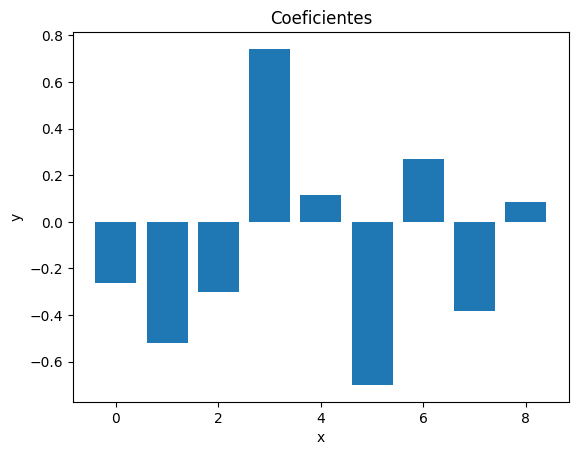

In [610]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [611]:
predictions = model.predict(X_dev)

In [612]:
y_dev

array(['CONTRADICTION', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL',
       'NEUTRAL', 'NEUTRAL', 'ENTAILMENT', 'ENTAILMENT', 'CONTRADICTION',
       'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'ENTAILMENT', 'NEUTRAL',
       'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'ENTAILMENT',
       'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL',
       'NEUTRAL', 'CONTRADICTION', 'NEUTRAL', 'CONTRADICTION', 'NEUTRAL',
       'NEUTRAL', 'NEUTRAL', 'CONTRADICTION', 'NEUTRAL', 'NEUTRAL',
       'NEUTRAL', 'ENTAILMENT', 'ENTAILMENT', 'NEUTRAL', 'NEUTRAL',
       'CONTRADICTION', 'NEUTRAL', 'ENTAILMENT', 'NEUTRAL',
       'CONTRADICTION', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL',
       'NEUTRAL', 'NEUTRAL', 'CONTRADICTION', 'ENTAILMENT', 'ENTAILMENT',
       'NEUTRAL', 'CONTRADICTION', 'NEUTRAL', 'NEUTRAL', 'ENTAILMENT',
       'NEUTRAL', 'ENTAILMENT', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL',
       'NEUTRAL', 'ENTAILMENT', 'NEUTRAL', 'CONTRADICTION', 'NEUTRAL',
       'CONTRADICTION', 'ENTAILMENT'

In [613]:
print(confusion_matrix(y_dev, predictions))

[[  0  36  33]
 [  0  47  72]
 [  0  96 211]]


In [614]:
print("acccuracy: ",round(accuracy_score(y_dev,predictions),2))
print("precision: ",round(precision_score(y_dev,predictions,average="weighted"),2))
print("recall",round(recall_score(y_dev,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_dev,predictions,average="weighted",zero_division=0),2))

acccuracy:  0.52
precision:  0.48
recall 0.52
f1_score:  0.5


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [615]:
predictions = model.predict(X_test)

In [616]:
list(predictions).count("NEUTRAL")

3062

In [617]:
list(predictions).count("CONTRADICTION")

16

In [618]:
list(y_test).count("NEUTRAL")

2748

In [619]:
list(y_test).count("ENTAILMENT")

1422

In [620]:
print(confusion_matrix(predictions,y_test,labels=['CONTRADICTION','NEUTRAL','ENTAILMENT']))

[[   3    7    6]
 [ 462 1729  871]
 [ 271 1012  545]]


In [621]:
print(confusion_matrix(y_test, predictions))

[[   3  271  462]
 [   6  545  871]
 [   7 1012 1729]]


In [622]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="weighted",zero_division=0),2))
print("recall",round(recall_score(y_test,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.46
precision:  0.43
recall 0.46
f1_score:  0.43
matthews_score:  0.01


In [623]:
X_train.shape

(4439, 9)

In [624]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [625]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [626]:
from sklearn.metrics import make_scorer,precision_score

In [627]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.570000 (0.021477)


In [628]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
scoring = make_scorer(precision_score, zero_division=0)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring="precision_weighted")
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined an

Logistic Regression: 0.410000 (0.080399)
Logistic Regression: 0.570000 (0.021477)
Logistic Regression: 0.450000 (0.040085)


In [629]:
print(confusion_matrix(y_test, predictions))

[[   3  271  462]
 [   6  545  871]
 [   7 1012 1729]]


In [630]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.080000 (0.071625)


# SHAP

In [631]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [632]:
model = linear_model.LogisticRegression().fit(X_train,y_train)

In [633]:
explainer = shap.Explainer(model,X_train)
shap_values = explainer.shap_values(X_test)

In [634]:
explainer.expected_value

array([-0.90886051, -0.15123861,  1.06009912])

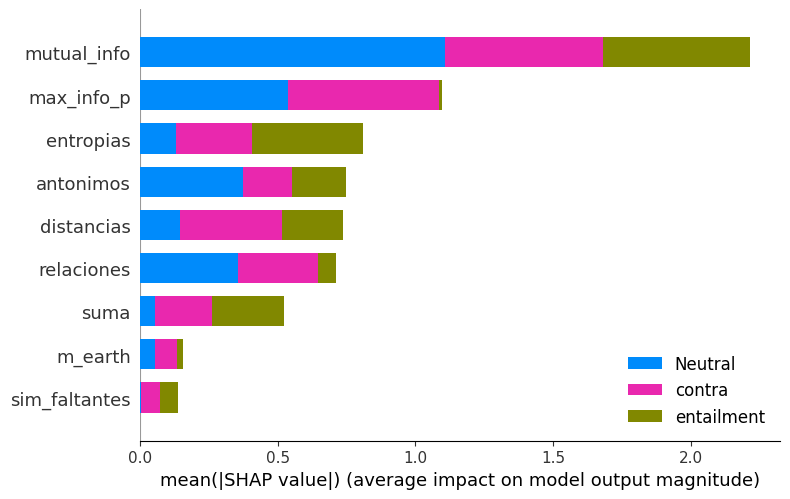

In [635]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1],class_names=['contra', 'Neutral','entailment'])